In [ ]:
!pip install piml "pandas<=2.0" "numpy<1.24" "xgboost<1.7.3" "pygam<0.9.0"

### import library

In [1]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import *

### import data

## Taiwan Credit default data

In [3]:
import piml
piml.__version__

'0.4.2.post4'

## initiate piml experiment

In [3]:
from piml import Experiment
exp = Experiment()

### load data

In [4]:
exp.data_loader("TaiwanCredit")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,3.592621,3.491782,2.838849,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,3.428621,3.237041,3.428621,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465977,4.146996,4.132260,4.156307,4.174612,4.191730,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672015,4.683353,4.692776,4.452016,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.935406,3.753660,4.554319,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5.276345,5.285143,5.318827,4.944507,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,3.226342,3.262214,3.544440,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3.552181,3.525951,3.440752,4.319710,4.313509,4.286860,0.000000,0.000000,4.342443,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-3.216430,4.894205,4.882553,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


In [5]:
#PAY_1: repayment at sept 2005, (delay in payment) PAY_2 : August 2005,..PAY_6 April 2005

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

### data summary

In [5]:
exp.data_summary(feature_exclude=["SEX",  "MARRIAGE"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(30000, 24)')

### exploratory data analysis

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

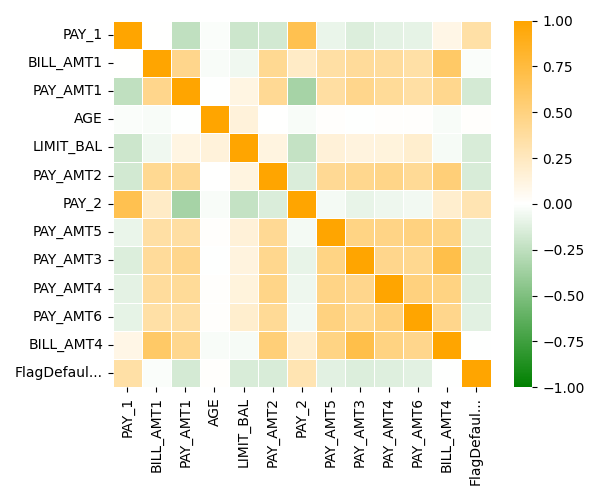

In [20]:
exp.eda(show = 'multivariate', figsize = (6,5))

## Data Preparation 

In [6]:
exp.data_prepare(target='FlagDefault', task_type='Classification', test_ratio=0.3, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,0,1
0,Excluded columns,"[SEX, MARRIAGE]"
1,Target variable,FlagDefault
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.3
6,Random state,0


## Feature selection
using permutation based feature importance from a light gbm model

In [22]:
exp.feature_select(method = 'pfi',threshold = 0.8)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

### Extract training data from pipeline 
to tune HP of XGB model to be later fit

In [55]:
train = exp.get_data(train = True)
train_x = train[0]
train_y = train[1]
test = exp.get_data(test = True)
test_x = test[0]
test_y = test[1]


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [56]:
train_x.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

(21000, 12)

### Tuning and training model

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,4,5,6], 'learning_rate':[0.1,0.05,0.2,0.15]}
xgb = XGBClassifier(n_estimators = 300)
clf = GridSearchCV(xgb, parameters,scoring = 'neg_log_loss')
clf.fit(train_x,train_y)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

In [38]:
clf.best_params_

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

{'learning_rate': 0.05, 'max_depth': 3}

In [19]:
xgbtuned = XGBClassifier(n_estimators = 300,max_depth = 3,learning_rate=0.05, random_state = 0)
xgbtuned.fit(train_x,train_y)



HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### get reference well predicted and badly predicted point in test data

In [57]:
residtest = test_y.T - xgbtuned.predict_proba(test_x)[:,1]

residtest.shape
absresidtest = np.abs(residtest)
idx = np.arange(test_y.shape[0])
test_bad_index = idx[residtest[0,:]==np.max(residtest)]
test_good_index = idx[absresidtest[0,:]==np.min(absresidtest)]
print(test_bad_index,test_good_index)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[5325] [1224]


### get reference well predicted and badly predicted point in train data

In [58]:
residtrain = train_y.T-xgbtuned.predict_proba(train_x)[:,1]
absresidtrain = np.abs(residtrain)
idx = np.arange(train_y.shape[0])
train_bad_index = idx[residtrain[0,:]==np.max(residtrain)]
train_good_index = idx[absresidtrain[0,:]==np.min(absresidtrain)]
print(train_bad_index,train_good_index)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[10479] [1433]


In [59]:
xgbtuned.predict_proba(train_x)[10479,1]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

0.0377292

In [60]:
np.log(0.038/(1-0.038))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

-3.231428290939321

## Training models in piml
note that XGB is fastest and EBM is slowest. 

In [25]:
from piml.models import GAMINetClassifier, ExplainableBoostingClassifier
import time 
models = {
          
          'XGB': XGBClassifier(max_depth = 3, learning_rate = 0.05,n_estimators = 300,random_state=0),
          'GAMI-NET': GAMINetClassifier(interact_num=10, loss_threshold=0.01,  
                        subnet_size_main_effect=[20], 
                        subnet_size_interaction=[20,20], random_state = 0),
          'EBM': ExplainableBoostingClassifier(interactions=10, random_state=0)
         }

for key,model in models.items():
    print (key)
    start = time.time()
    exp.model_train(model = model, name = key)
    end = time.time()
    print(end - start)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

XGB


HTML(value="<p class='notification info'>Register XGB Done</p>")

1.7405664920806885
GAMI-NET


HTML(value="<p class='notification info'>Register GAMI-NET Done</p>")

52.096323013305664
EBM


HTML(value="<p class='notification info'>Register EBM Done</p>")

100.55436396598816


## Model performance

In [26]:
exp.model_diagnose(model='GAMI-NET', show='accuracy_result', figsize = (4,4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8173,0.7788,0.3397,0.6845,0.4540
Test,0.8270,0.7759,0.3428,0.7022,0.4607
Gap,0.0097,-0.0029,0.0031,0.0177,0.0067


In [27]:
exp.model_diagnose(model='XGB', show='accuracy_result', figsize = (4,4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8240,0.8077,0.3682,0.7034,0.4834
Test,0.8267,0.7780,0.3567,0.6892,0.4701
Gap,0.0027,-0.0297,-0.0115,-0.0142,-0.0133


In [11]:
exp.model_diagnose(model='EBM', show='accuracy_result', figsize = (4,4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.8201,0.7884,0.3537,0.6912,0.4680
Test,0.8254,0.7768,0.3500,0.6866,0.4636
Gap,0.0053,-0.0116,-0.0037,-0.0047,-0.0043


## model explainability - global - post hoc

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

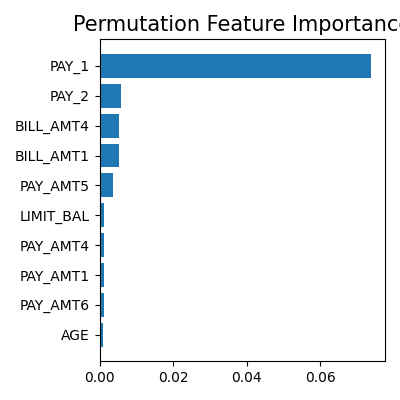

In [12]:
exp.model_explain(model='XGB', show='global_pfi', uni_feature='PAY_1', figsize=(4,4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

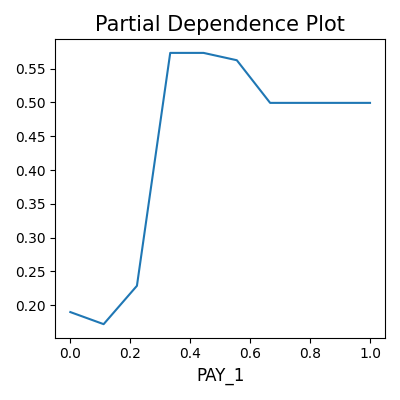

In [13]:
exp.model_explain(model='XGB', show='global_pdp', uni_feature='PAY_1', figsize=(4,4))## add another, preferably showing some unexpected pattern

In [14]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

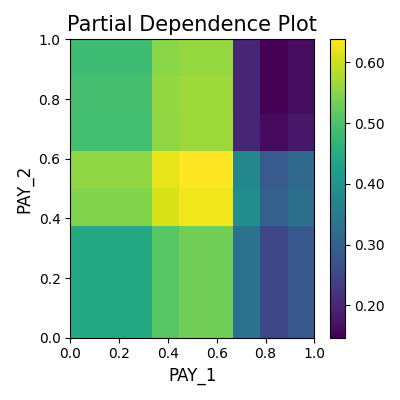

In [79]:
exp.model_explain(model='XGB', show='global_pdp', bi_features=['PAY_1','PAY_2'], figsize=(4,4), sample_size = 5000)

## model explainability local - post-hoc

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

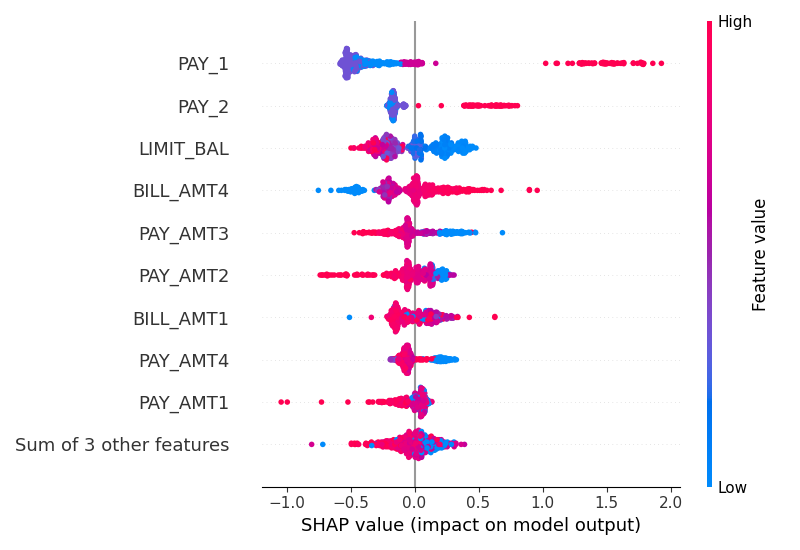

In [29]:
exp.model_explain(model='XGB', show='global_shap_summary', figsize=(4,4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

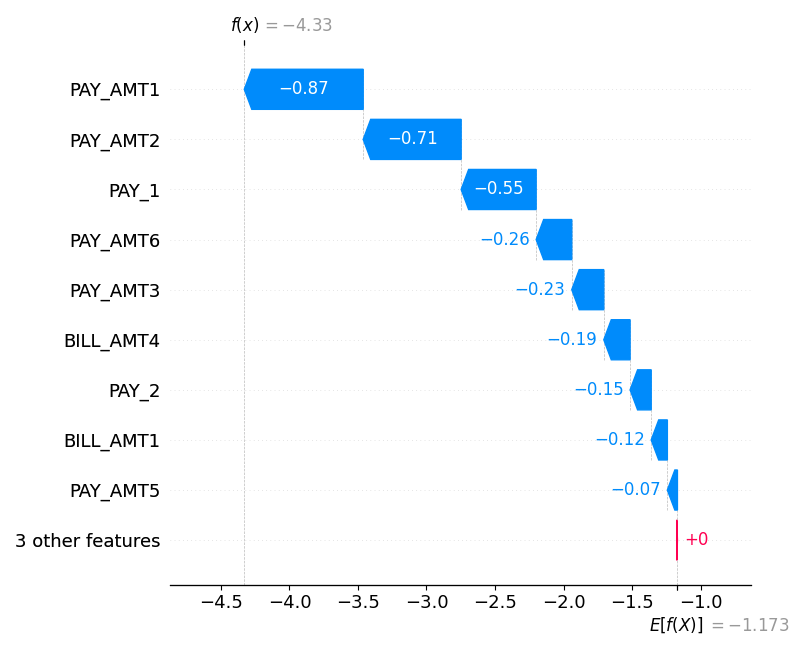

In [28]:
## bad,good [10479] [1433]
exp.model_explain(model = 'XGB',show = 'local_shap',figsize = (4,4), sample_id =1433)

## Inherent interpretation - global

In [15]:
exp.model_interpret(model = 'GAMI-NET', show = 'global',uni_feature = 'PAY_1',bi_features = ['PAY_1','PAY_AMT1'] )#, bi_features = ['PAY_1','PAY_2']

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

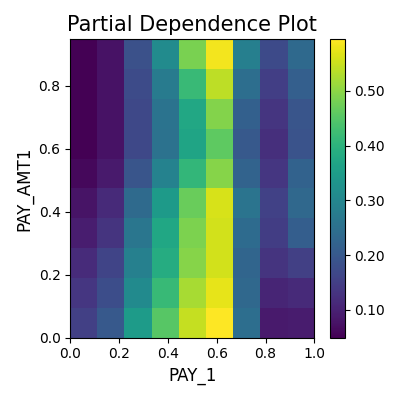

In [67]:
exp.model_explain(model='GAMI-NET', show='global_pdp', bi_features=['PAY_1','PAY_AMT1'], figsize=(4,4), sample_size = 2000)
### PAY_AMT1 does not have any effect so the pdp is combination of PAY_! and their interaction effect

In [30]:
exp.model_interpret(model = 'EBM', show = 'global',uni_feature = 'PAY_1',bi_features = ['PAY_1','PAY_AMT4'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

### pdp for EBM vs GAMI-NET shows the nature of the model. 
EBM is estimating effects as a series of step functions due to underlying tree based structure
GAMI-NET due to its RELU activation is estimating it as piecewise linear function

## Inherent interpretation - local

In [32]:
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Model Performance and over-fitting

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

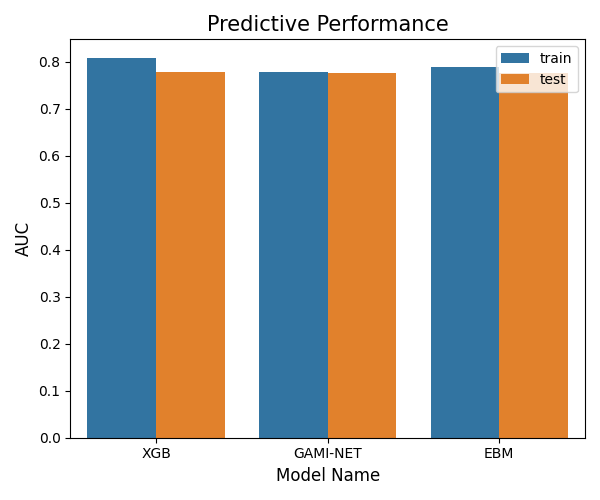

In [84]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'], show='accuracy_auc', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

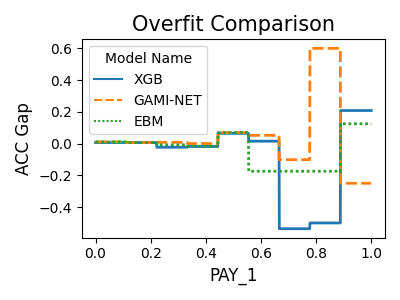

In [102]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'],show='overfit_perf',target_feature = 'PAY_1', figsize=(4, 3),metric = 'ACC')

In [105]:
ind = 1*((train_x[:,0]>0.65)&(train_x[:,0]<0.85))
np.sum(ind)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

33

In [106]:
ind = 1*((test_x[:,0]>0.65)&(test_x[:,0]<0.85))
np.sum(ind)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

4

In [ ]:
### low number of obs in high Pay_1. hence hard to conclude over-fitting

## Reliability Diagram measuring bias in estimated probabilities

 * callibrate predicted probabilities
 * compute brier score (lower is better)
 * bin callibrated probabilities
 * for each bin get observed frequency and mean predicted callibrated probability
 * plot mean prob vs obs freq

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

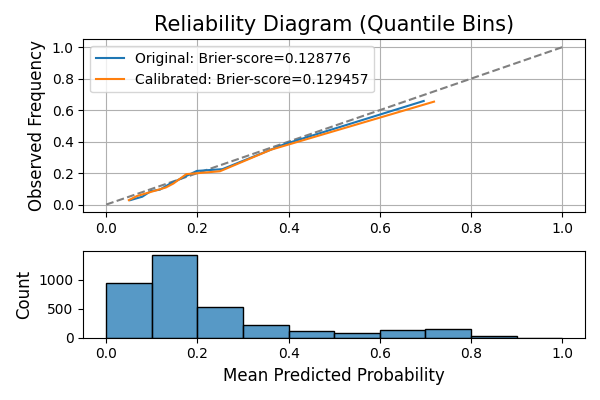

In [110]:
exp.model_diagnose(model='XGB',show='reliability_perf', figsize=(6, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

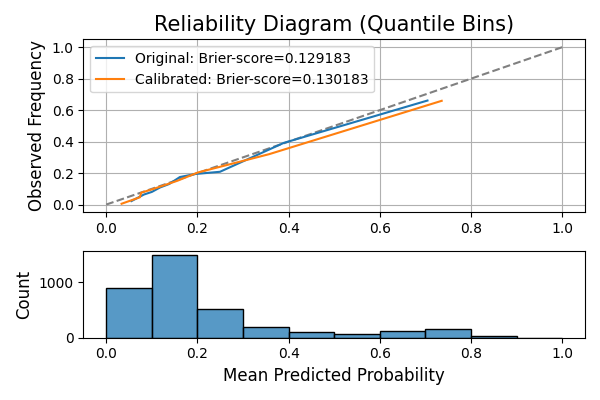

In [111]:
exp.model_diagnose(model='EBM',show='reliability_perf', figsize=(6, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

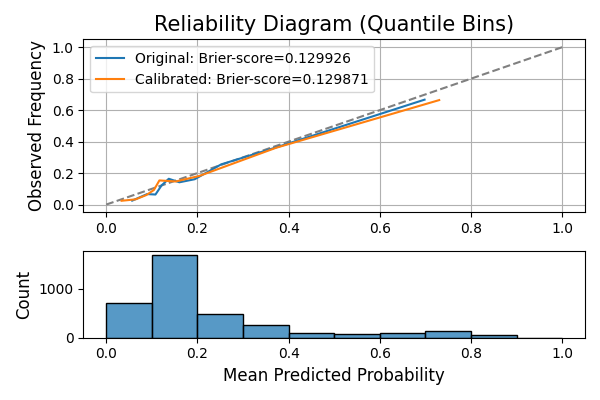

In [112]:
exp.model_diagnose(model='GAMI-NET',show='reliability_perf', figsize=(6, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

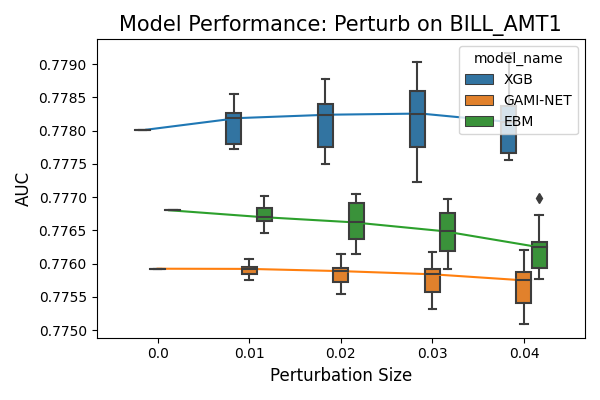

In [113]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'],show='robustness_perf', figsize=(6, 4), perturb_size = 0.01, perturb_features = ['BILL_AMT1'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

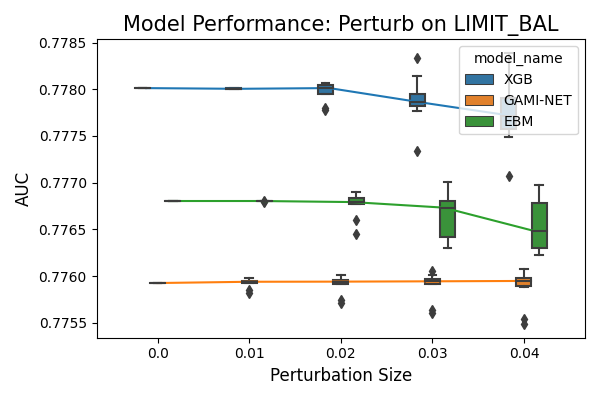

In [115]:
exp.model_compare(models=['XGB', 'GAMI-NET', 'EBM'],show='robustness_perf', figsize=(6, 4), perturb_size = 0.01, perturb_features = ['LIMIT_BAL'])

### faireness of models assessed wrt sex and marriage

In [12]:
exp.model_fairness_compare()
## sex : 2 is female
## marriage 1 - married, 2-single,3-others

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### data prep

In [66]:
enc_sex = pd.get_dummies(taiwan['SEX'], drop_first = True,prefix = 'SEX')
enc_marriage = pd.get_dummies(taiwan['MARRIAGE'], drop_first = True,prefix = 'MARRIAGE')
taiwan.drop(columns = ['SEX','MARRIAGE'], inplace = True)
taiwan = pd.concat([taiwan,enc_sex,enc_marriage],axis = 1)

In [97]:
taiwan_scaled = taiwan.copy()
scaler = MinMaxScaler()
taiwan_scaled[['LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1','PAY_0']] = scaler.fit_transform(taiwan_scaled[['LIMIT_BAL','AGE','BILL_AMT1','PAY_AMT1','PAY_0']])
taiwan_scaled.describe()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,0.159075,1.853133,0.249750,0.19833,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.603733,0.455300,0.532133,0.010767
std,8660.398374,0.131058,0.790349,0.158929,0.11238,1.197186,1.196868,1.169139,1.133187,1.149988,...,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.489129,0.498006,0.498975,0.103204
min,1.000000,0.000000,0.000000,0.000000,0.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,0.040404,1.000000,0.120690,0.10000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,0.131313,2.000000,0.224138,0.20000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,22500.250000,0.232323,2.000000,0.344828,0.20000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,30000.000000,1.000000,6.000000,1.000000,1.00000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### setting response and covariates and data split

In [98]:
yvar = 'default payment next month'
xvars = ['LIMIT_BAL','SEX_2','MARRIAGE_1','MARRIAGE_2','MARRIAGE_3','EDUCATION','AGE','PAY_0','BILL_AMT1','PAY_AMT1']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(taiwan_scaled[xvars], taiwan_scaled[yvar], test_size=.3, random_state = 123)

In [100]:
X_test.head()

,LIMIT_BAL,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION,AGE,PAY_0,BILL_AMT1,PAY_AMT1
25665,0.030303,1,0,1,0,2,0.086207,0.1,0.172173,0.001488
16464,0.070707,1,1,0,0,3,0.655172,0.2,0.213471,0.003677
22386,0.161616,1,0,1,0,1,0.155172,0.4,0.284482,0.007784
10149,0.191919,1,1,0,0,2,0.344828,0.0,0.167376,0.000849
8729,0.040404,0,1,0,0,2,0.379310,0.2,0.153788,0.001305


### model fit and performance

In [114]:
models = {'LR':LogisticRegression( max_iter = 200),
          'RF': RandomForestClassifier(max_depth = 12, min_samples_leaf = 5,random_state = 123),
         'XGB': XGBClassifier(max_depth = 4,n_estimators = 180, learning_rate = 0.08,random_state = 123),
         'FFNN': MLPClassifier(hidden_layer_sizes = (100,30),solver = 'adam',random_state = 123, max_iter = 500)}
train_res = pd.DataFrame(y_train)
test_res = pd.DataFrame(y_test)
for key,model in models.items():
   # print (key, model)
    model.fit(X_train,y_train)
    train_res[key] = model.predict_proba(X_train)[:,1]
    test_res[key] = model.predict_proba(X_test)[:,1]
    print('fitted ', key)
    train_auc = roc_auc_score(y_train,train_res[key])
    test_auc = roc_auc_score(y_test,test_res[key])
    train_logloss = log_loss(y_train,train_res[key])
    test_logloss = log_loss(y_test,test_res[key])
    print('Logloss| Train: ', train_logloss, ' Test: ', test_logloss)
    print('AUC| Train: ', train_auc, ' Test: ', test_auc)
    
    
    
    


fitted  LR
Logloss| Train:  0.47197252161115205  Test:  0.46272372236770104
AUC| Train:  0.7134038447375161  Test:  0.7175021561739661
fitted  RF
Logloss| Train:  0.37473879510136143  Test:  0.43072696747725364
AUC| Train:  0.8681026091890727  Test:  0.7696540498217407
fitted  XGB
Logloss| Train:  0.41238815060470785  Test:  0.42873326288298186
AUC| Train:  0.8091377691332999  Test:  0.7736146909843102
fitted  FFNN
Logloss| Train:  0.43577242978498837  Test:  0.4360140925677582
AUC| Train:  0.7703275881404759  Test:  0.758888466842383
